In [23]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import ipywidgets as widgets
import traitlets
import pandas as pd
import numpy as np
import re
import bqplot
from bqplot import (
    OrdinalScale, LinearScale, Bars, Lines, Axis, Figure
)
#from wordcloud import WordCloud, STOPWORDS
plt.rcParams["figure.figsize"] = (16, 10)

In [24]:
data = pd.read_csv("movie_sample.csv", sep=None)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [25]:
data

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful1,helpful2
0,AV6QDP8Q0ONK4,B001AYWY9K,"The Movie Guy ""Movies from A to Z""",** Early plot spoilers**I am not a fan of Tim ...,2,THE SOUND OF ONE HAND CLAPPING,1288137600,"10 27, 2010",1,1
1,A1M4NJYP0WNL8Q,B0000D9BEB,"Marc Ruby&#8482; ""The Noh Hare&#8482;""",This is the second DVD in a series that is pro...,5,Angels and Devils,1071878400,"12 20, 2003",9,10
2,A100RW34WSLTUW,B004K4FUUC,Jesse Beitz,Wonderful series that reminds me of the Elizab...,5,Like Elizabeth Gaskill,1393632000,"03 1, 2014",0,0
3,AQZ0K4JCHIHBV,630336473X,Kristin Rattigan,This sounds like a more modern movie and many ...,3,Our Little Girl-we don't care about her,997574400,"08 12, 2001",7,9
4,A1GKTHLZOWBLKL,B005LAIIMG,Cidney Webster,Let's get one thing straight: this is not a zo...,3,Perfect Popcorn for Prime,1402704000,"06 14, 2014",1,2
5,A3EHYVC35E5WRG,B002ZG9864,Valmina,Cute movie. Really funny. Tom and Cameron are ...,5,Fun Movie,1378857600,"09 11, 2013",0,0
6,A30X6EFTCNAJ7C,B002AMW108,"Dbzgirl ""Rosie""","I've watched most of the episodes of ""Flapjack...",3,"""The Marvelous Misadventures of Flapjack"" DVD",1247702400,"07 16, 2009",2,82
7,A3KF4IP2MUS8QQ,B001VC99HG,"Daniel Jolley ""darkgenius""",Come on down to Florida for some good old-fash...,4,A highly predictable yet entertaining film wit...,1313193600,"08 13, 2011",0,0
8,A2Z2MUZ76N5EY7,B0000AUHOD,James E. Carroll,Albert Finney's portrayal of retiring classics...,4,A Superb Film,1074038400,"01 14, 2004",31,31
9,AFLVXJNQLBTXW,630264187X,Ayrton Roberto Pastore,I am collector of moviesThe master Bergman sho...,5,delivery went smoothly,1382572800,"10 24, 2013",0,0


In [26]:
df = pd.DataFrame(data.reviewTime.str.split(',',2).tolist(),
                                   columns = ['Day/Month','year'])
data["year"] = df["year"]

## ----------------------------------------------------------------------------------------------------------------------------------




# Words

In [27]:
def getWords(text):
    return re.compile('\w+').findall(text)

test = getWords(data["reviewText"].to_string())

from collections import Counter

wordcount = Counter(test)

#wordcount.most_common(10)



In [28]:
#done on local machine dont run until word cloud is installed
from wordcloud import WordCloud, STOPWORDS
kam = ' '.join(test)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(collocations=False, background_color="white", max_font_size=200, stopwords=stopwords).generate(kam)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

### This is a wordcloud made of the most popular words that appeared in the dataset amazon movie reviews. This was created using the wordcloud package. As the words that appear larger have more appearances in dataset while smaller words appear less times. The colors are the default colors except we set the background color to white to make it easier to read.

## --------------------------------------------------------------------------------------------------------------------------------




# Movies per year

In [29]:
from IPython.display import display 
from collections import Counter

In [30]:
#youll have to run this cell to show plot

import ipywidgets as widgets
from collections import Counter
df2 = data.groupby("year")
#@ipywidgets.interact(yr = [i for i in range(1998,2014)])
yr = widgets.Dropdown(options=[i for i in range(1998,2015)],value=1998,description='yr',disabled=False)
def draw_movie_number(yr):
    t = df2.get_group(' %s' % yr)
    c = Counter(t["overall"])
    it = c.items()
    key = [i[0] for i in it]
    value = [i[1] for i in it]
    plt.xlabel("Overall")
    plt.ylabel("Movie_number")
    size = 2**2
    
    plt.bar(c.keys(), c.values())
    plt.show()
    
    
    

widgets.interactive(draw_movie_number,yr = yr)


interactive(children=(Dropdown(description='yr', options=(1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014), value=1998), Output()), _dom_classes=('widget-interact',))

### This is a bar graph to show the reviews per year. This is interactive so that you can see the different years and their values accordinly. This was used doing ipywidgets as well as matplotlib. 

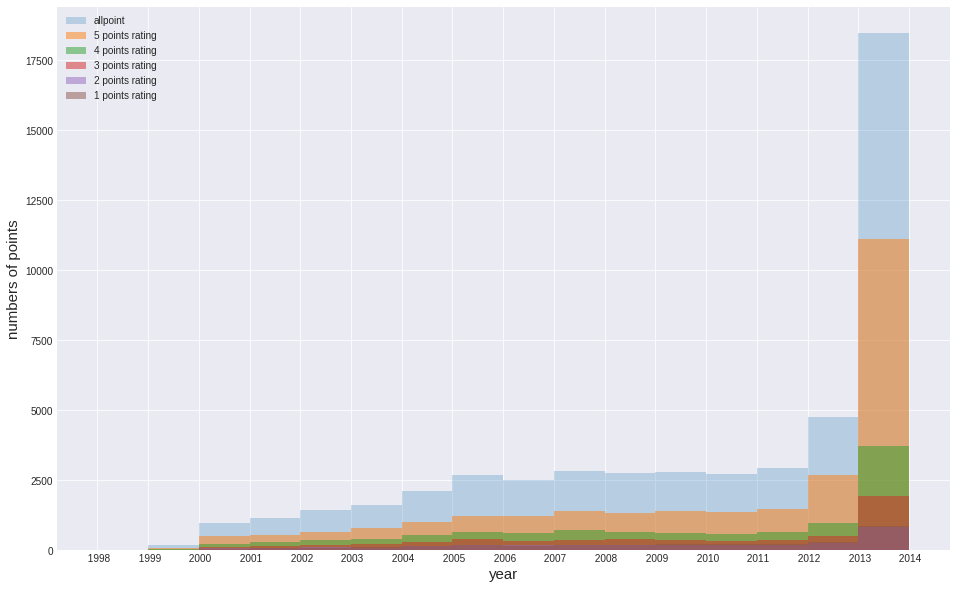

In [31]:
def filter_by_point(data, point):
    point_array = np.array([point]) == np.array(data["overall"])
    return point_array

allpoint = data["year"]
point1 = data["year"][filter_by_point(data, 1)]
point2 = data["year"][filter_by_point(data, 2)]
point3 = data["year"][filter_by_point(data, 3)]
point4 = data["year"][filter_by_point(data, 4)]
point5 = data["year"][filter_by_point(data, 5)]




plt.hist(allpoint,bins=16, alpha=0.25,label="allpoint")
plt.hist(point5,bins=16,alpha=0.5,label="5 points rating")
plt.hist(point4, bins=15, alpha=0.5,label="4 points rating")
plt.hist(point3, bins=16,alpha=0.5,label="3 points rating")
plt.hist(point2, bins=16,alpha=0.5,label="2 points rating")
plt.hist(point1, bins=15,alpha=0.5,label="1 points rating")

plt.xlabel("year",fontsize=15)
plt.ylabel("numbers of points",fontsize=15)


plt.legend()
plt.show()

### This also shows the number of ratings per year but shows it over time. The blue is the total number of reviews that happened over the whole dataset while the other colors represent the number of ratings for that specific year. This is not interactive because you wouldnt be able to compare years over time. This was done using matplotlib

## ----------------------------------------------------------------------------------------------------------------------------------




# Movies per year


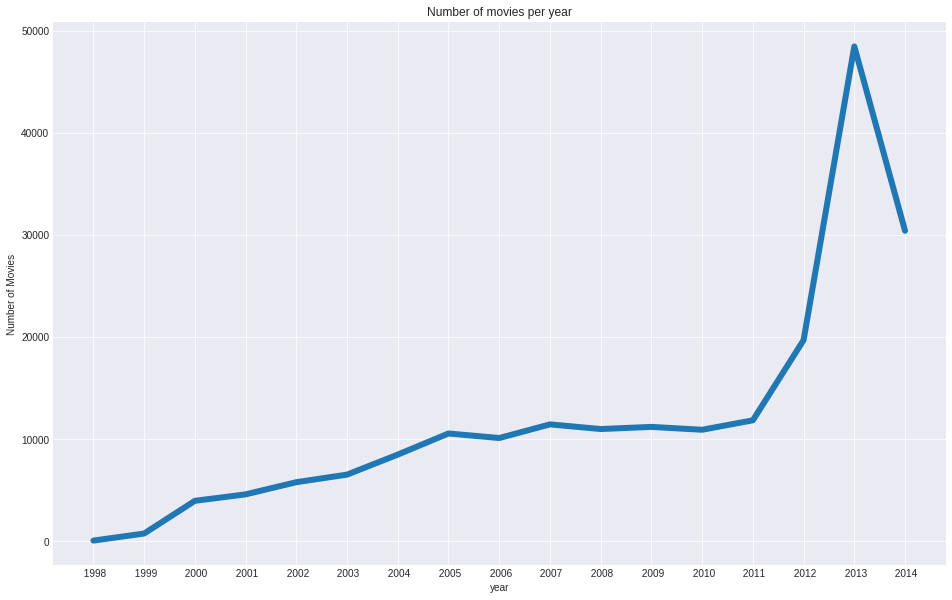

In [32]:
m = data.groupby("year")["overall"].sum()
x = m.index
y = m
plt.title('Number of movies per year')
plt.xlabel("year")
plt.ylabel("Number of Movies")
plt.plot(x,y,linewidth = 6)

### This is a visualization of number of movies per year. This is not intereactive because it is supposed to show how movies have increased over time. This was done using matplotlib.

# ------------------------------------------------------------------------------------------------------------


# Correlations

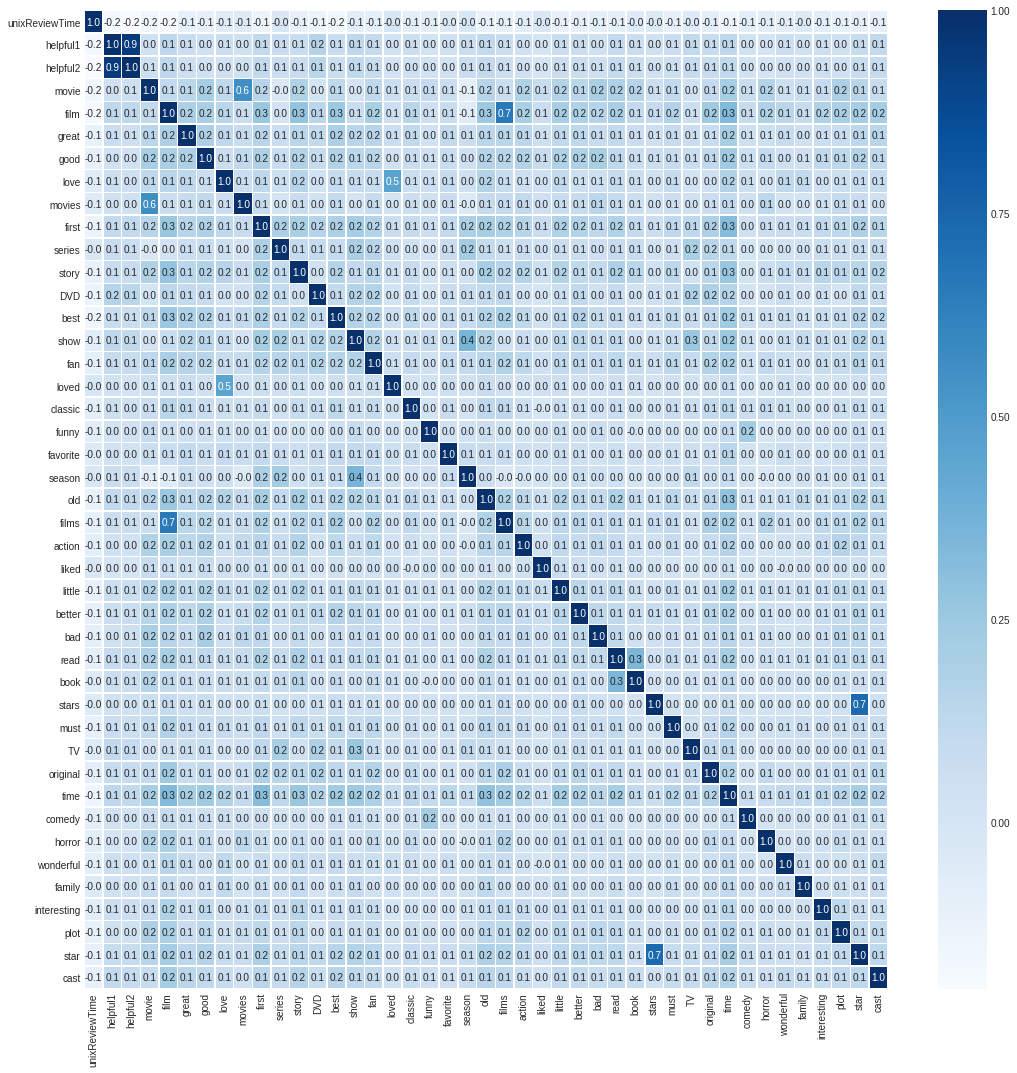

In [33]:
from collections import Counter
import seaborn as sns
import pylab

df = pd.DataFrame(data.reviewTime.str.split(',',2).tolist(), columns = ['Day/Month','year'])
data["year"] = df["year"]

def getWords(text):
    return re.compile('\w+').findall(text)

words = getWords(data["reviewText"].to_string())

totalWords = Counter(words)

selectWords = ["movie", "film", "great", "good", "love", "movies", "first", "series", "story", "DVD", "best",
                  "show", "fan", "loved", "classic", "funny", "favorite", "season", "old", "films", "action", "liked", 
                  "little", "better", "bad", "read", "book", "stars", "must", "TV", "original", "time", "comedy",
                  "horror", "wonderful", "family", "interesting", "plot", "star", "cast"]

count = len(re.findall('\w+', str(selectWords)))

test = data["reviewText"].to_string()

wordlist = data["reviewText"].tolist()
a = data["reviewText"].tolist()

list_of_lists = []
for review in a:
    count_list = []
    #print(count_word)
    for count_word in selectWords:
        count = len(re.findall(count_word, str(review)))
        count_list.append(count)
    list_of_lists.append(count_list)

data2 = pd.DataFrame(list_of_lists, columns = selectWords)

result = pd.concat([data, data2], axis=1, ignore_index=False)

y = result.overall                         
list = ['overall']
x = result.drop(list,axis = 1)

#correlation map that shows which variables are correlated and should be eliminated
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="Blues")
pylab.show()

### The graph above shows the correlation of the variables for "overall" review ratings. The darker the cells, the more correlations the variables have between each other. Ignoring the diagonal line, we can detect instances where two variables are highly correlated to each other, which creates multicollinearity when modeling. Therefore, now we know which variables to remove if we were to create a statistical model.

# ---------------------------------------------------------------------------------------------------------


# Movie Genres Over Time

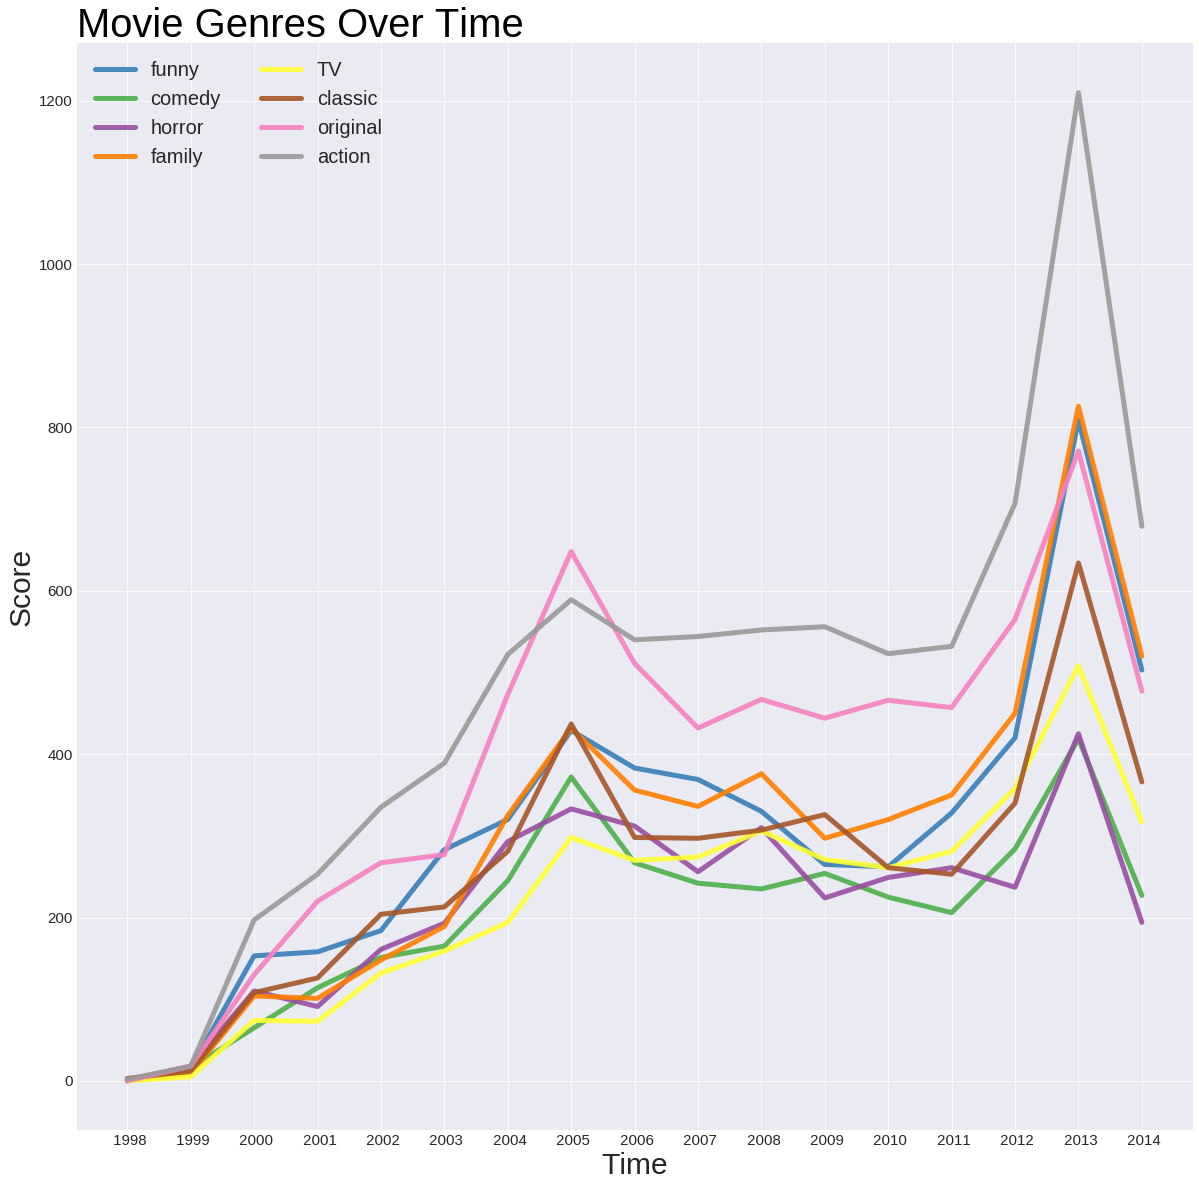

In [34]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

import seaborn as sns

df = result[['year', 'funny', 'comedy', 'horror', 'family', 'TV', 'classic', 'original', 'action']]
df2 = df.groupby("year")[['funny', 'comedy', 'horror', 'family', 'TV', 'classic', 'original', 'action']].sum()
df2 = df2.reset_index()
    

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 20))
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df2.drop('year', axis=1):
    num = num + 1
    plt.plot(df2['year'], df2[column], marker='', color=palette(num), linewidth=5, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2, prop={'size': 20})


# Add titles
plt.title("Movie Genres Over Time", loc='left', fontsize=40, fontweight=0, color='black')
plt.xlabel("Time", fontsize = 30)
plt.ylabel("Score", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
pylab.show()

### We took the keywords and made them into variables and then proceeded to create a time series plot. It seems that ther was very little data for movies from 1998, or perhaps Amazon just doesn't offer many movies from those time periods. But we can see that Amazon movies had a huge increase across all genres in 2005, and then another one in 2013, which almost doubled in increase compared to 2005. But, it seems that the genres are all drastically decreasing by 2014, which could mean a new genre was invented, or not enough data was provided.